In [1]:
import pandas as pd # Pandas লাইব্রেরি pd নামে ব্যবহার করা (ডেটা ম্যানিপুলেশনের জন্য)
import numpy as np # NumPy লাইব্রেরি np নামে ব্যবহার করা (ম্যাথ, array, matrix operations এর জন্য)
import operator # Python এর operator module ব্যবহার করা (arithmetic, comparison, sorting, etc. সহজে করার

In [2]:
from google.colab import files
files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


{'Salary_Data (1).csv': b'YearsExperience,Salary\r\n1.1,39343\r\n1.3,46205\r\n1.5,37731\r\n2,43525\r\n2.2,39891\r\n2.9,56642\r\n,60150\r\n3.2,54445\r\n3.2,64445\r\n3.7,57189\r\n3.9,63218\r\n,55794\r\n4,56957\r\n4.1,57081\r\n4.5,61111\r\n4.9,67938\r\n,66029\r\n5.3,83088\r\n5.9,81363\r\n6,93940\r\n6.8,91738\r\n7.1,98273\r\n7.9,101302\r\n8.2,113812\r\n,109431\r\n9,105582\r\n9.5,116969\r\n9.6,112635\r\n10.3,122391\r\n10.5,121872\r\n'}

In [4]:
data = pd.read_csv('Salary_Data.csv')

In [5]:
data.sample(10) # 👉 ডেটাসেট থেকে র‍্যান্ডমভাবে ১০টি row দেখানো।

,YearsExperience,Salary
24,NaN,109431
29,10.5,121872
15,4.9,67938
19,6.0,93940
12,4.0,56957
0,1.1,39343
10,3.9,63218
16,NaN,66029
23,8.2,113812
17,5.3,83088


In [6]:
data.head(10)

# 👉 ডেটাসেটের প্রথম ১০টি row দেখানো।

# ডিফল্ট হলে head() ৫টি দেখায়, এখানে explicitly ১০ টা চাইছেন।

# ব্যবহার হয় ডেটা দ্রুত পরীক্ষা করার জন্য 👀

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,NaN,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [7]:
data.tail(10)

# 👉 ডেটাসেটের শেষ ১০টি row দেখানো।

# tail() → ডিফল্ট ৫টি row দেখায়

# tail(10) → স্পেসিফিক সংখ্যা (এখানে ১০) row দেখায় ✅

,YearsExperience,Salary
20,6.8,91738
21,7.1,98273
22,7.9,101302
23,8.2,113812
24,NaN,109431
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
data.describe() # 👉 ডেটাসেটের স্ট্যাটিস্টিকাল summary দেখানো।

,YearsExperience,Salary
count,26.000000,30.000000
mean,5.330769,76003.000000
std,2.932271,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [17]:
data.isnull().sum(axis=0) # 👉 প্রতি কলামে (column-wise) কয়টা করে missing/null value আছে সেটা গুনে দেখানো।

,0
YearsExperience,0
Salary,0


In [18]:
data = data.dropna() # 👉 যেসব row-তে অন্তত একটি null value আছে, সেগুলো পুরো row সহ ডেটা থেকে বাদ দেওয়া।

In [19]:
data = data.head() # 👉 ডেটাসেটের প্রথম ৫টি row নেওয়া (ডিফল্টভাবে)।

In [20]:
import matplotlib.pyplot as plt # 👉 Matplotlib লাইব্রেরির pyplot মডিউলকে plt নামে ব্যবহার করা, গ্রাফ/চার্ট আঁকার জন্য।

Text(0, 0.5, 'Salary')

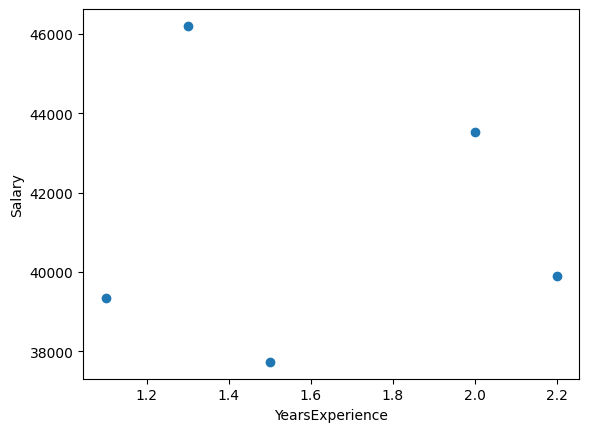

In [21]:
plt.scatter(data['YearsExperience'],data['Salary']) # plt.scatter(...) → ডাটা পয়েন্ট আকারে দেখায়
plt.xlabel('YearsExperience') # plt.xlabel(...) → X-axis নাম
plt.ylabel('Salary') # plt.ylabel(...) → Y-axis নাম

In [15]:
exp_avg = data['YearsExperience'].mean() # 👉 YearsExperience আর Salary কলামের গড় (average) মান বের করা।
sal_avg = data['Salary'].mean()

In [22]:
exp_salary = data['YearsExperience']*data['Salary'] # 👉 YearsExperience × Salary এবং YearsExperience এর square হিসাব করা (element-wise)।
exp_sq = data['YearsExperience']*data['YearsExperience']

In [23]:
m = (exp_avg*sal_avg - exp_salary.mean()) / (exp_avg*exp_avg - exp_sq.mean())
c = sal_avg - m*exp_avg


# 👉 Simple Linear Regression এর slope (m) এবং intercept (c) হিসাব করা।

# m → রেখার ঢাল (Salary কতটা Experience-এর সাথে বাড়ে)

# c → Y-intercept (Experience = 0 হলে Salary)

# সংক্ষেপে: best fit straight line বের করা 📈


In [24]:
print(m,c)

-109.90783410139284 41517.05069124426


In [27]:
exp = input('Enter the years of experience: ')  # 👉 ইউজারের কাছ থেকে Years of Experience ইনপুট নেওয়া ।

Enter the years of experience: 20


In [28]:
print(m*int(exp)+c)

# 👉 ইউজারের দেওয়া অভিজ্ঞতার (exp) উপর ভিত্তি করে Salary প্রেডিকশন করা।

# int(exp) → ইউজারের ইনপুট string কে integer এ কনভার্ট করা

# m*int(exp) + c → Simple Linear Regression formula: Salary = m*Experience + c

# print(...) → প্রেডিক্টেড Salary দেখানো 📈

39318.8940092164
